# Användningen av fftshift


In [12]:
import numpy as np
import matplotlib.pyplot as plt

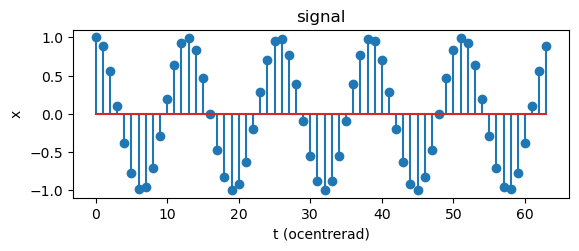

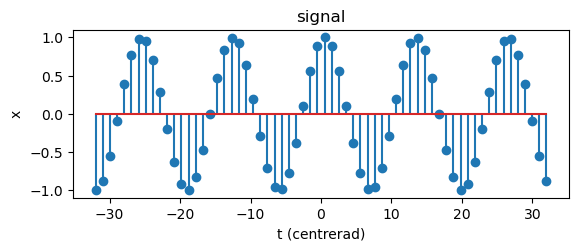

In [15]:
N = 64
x = np.cos(2 * np.pi * 5 * np.arange(N) / N)  # 5 Hz sinus

t = np.linspace(0,N-1,N)
t_centered = np.linspace(-N/2,N/2,N)

x_centered = np.fft.fftshift(x)


plt.subplot(2,1,1)
plt.stem(t, x)
plt.xlabel('t (ocentrerad)')
plt.ylabel('x')
plt.title('signal')
plt.show()
plt.subplot(2,1,2)
plt.stem(t_centered, x_centered)
plt.xlabel('t (centrerad)')
plt.ylabel('x')
plt.title('signal')
plt.show()

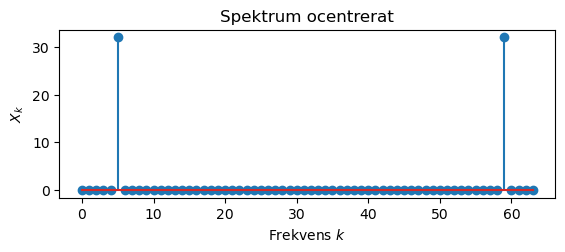

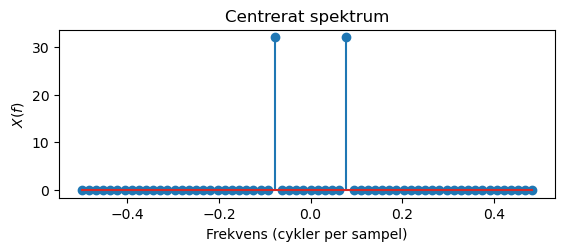

In [16]:
X = np.fft.fft(x)                 # Standard DFT: [0, 1, ..., 31, -32, ..., -1]
X_shifted = np.fft.fftshift(X)    # Centrerad: [-32, ..., -1, 0, 1, ..., 31]

k = np.arange(N)
k_centered = t_centered
freq = np.fft.fftfreq(N)          # [0, 1/N, ..., 0.5, -0.5, ..., -1/N]
freq_shifted = np.fft.fftshift(freq) # Frekvenser fftshiftade

plt.subplot(2,1,1)
plt.stem(k, np.abs(X))
plt.xlabel(r'Frekvens $k$')
plt.ylabel(r'$X_k$')
plt.title('Spektrum ocentrerat')
plt.show()

plt.subplot(2,1,2)
plt.stem(freq_shifted, np.abs(X_shifted))
plt.xlabel('Frekvens (cykler per sampel)')
plt.ylabel(r'$X(f)$')
plt.title('Centrerat spektrum')
plt.show()

# Uppgift: Skapa ett slumpmässigt trigonometriskt polynom med fft

I denna uppgift skall ni skapa ett slumpmässigt trigonometriskt polynom med `np.fft.fft`. 


- Skapa ett slumpmässigt trigonometriskt polynom med låga frekvenser.
- Lägga till vitt brus (höga frekvenser).
- Använda FFT för att filtrera bort bruset med ett lågpassfilter.
- Visualisera resultatet i tids- och frekvensdomänen.

---

### Förklaringar

- **Trigonometriskt polynom**: En summa av sinus- och cosinustermer med olika frekvenser, amplituder och faser. Här begränsar vi till låga frekvenser (`k = 1..5`).
- **Vitt brus**: Slumpmässigt brus med lika effekt i alla frekvenser – här simulerat med `np.random.randn`.
- **FFT**: Omvandlar signalen från tidsdomän till frekvensdomän.
- **Lågpassfilter**: Genom att nollställa Fourier-koefficienter för frekvenser högre än en viss gräns (`cutoff_freq`) tar vi bort högfrekventa komponenter (bruset).
- **Invers FFT**: Återställer signalen till tidsdomänen efter filtrering.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

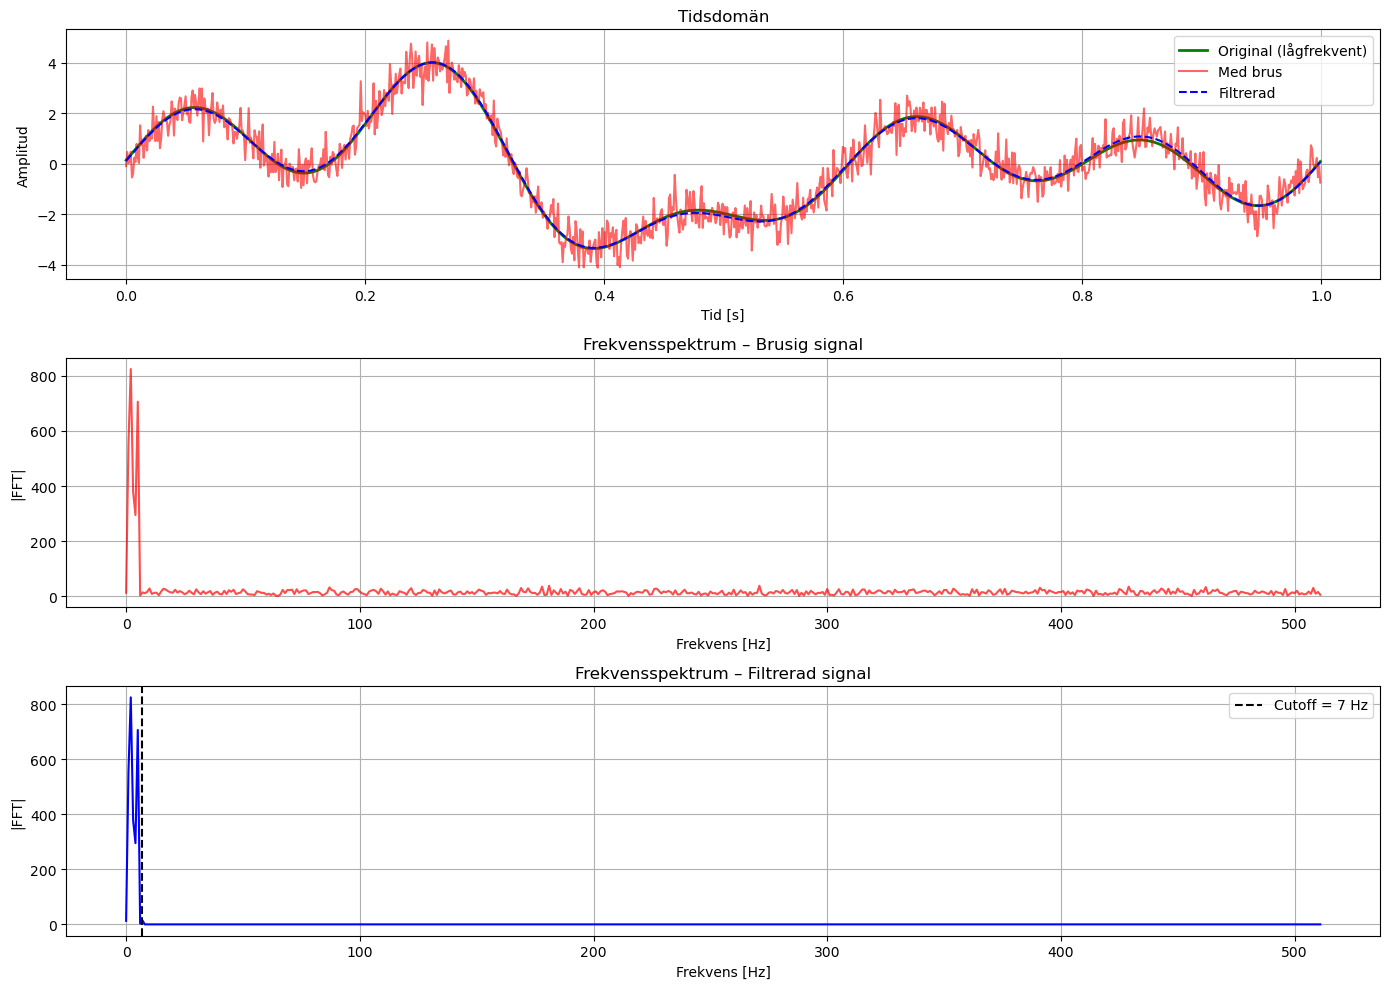

In [3]:
# 1. Inställningar
np.random.seed(42)  # För reproducerbarhet
N = 1024            # Antal sampel
T = 1.0             # Total tid (sekunder)
t = np.linspace(0, T, N, endpoint=False)  # Tidsvektor
freqs = np.fft.fftfreq(N, d=T/N)  # Frekvensaxel. (Hz)

# 2. Skapa ett slumpmässigt trigonometriskt polynom (signal_clean) med låga frekvenser
# Vi använder bara frekvenser upp till 5 Hz. 
max_low_freq = 5

# Uppgift: Skapa det slumpmässiga trigonometriska polynomet signal_clean

# 3. Lägg till vitt brus (höga frekvenser)
noise_amplitude = 0.5
# Uppgift: Skapa signal_noisy


# 4. Utför FFT på den brusiga signalen
fft_noisy = np.fft.fft(signal_noisy)


# 5. Designa ett enkelt lågpassfilter (nollställ höga frekvenser)
# Uppgift: Skapa fft_filtered (Filtrerad signal på fouriersidan)
cutoff_freq = max_low_freq + 2  # Låt t.ex. frekvenser upp till max_low_freq+2 Hz passera
fft_filtered = fft_noisy.copy()
# Uppgift:  filtrera 

# 6. Gå tillbaka till tidsdomänen med invers FFT : signal_filtered
signal_filtered = np.fft.ifft(fft_filtered).real



# 7. Plotta resultatet
plt.figure(figsize=(14, 10))

# Tidsdomän
plt.subplot(3, 1, 1)
plt.plot(t, signal_clean, label='Original (lågfrekvent)', color='green', linewidth=2)
plt.plot(t, signal_noisy, label='Med brus', color='red', alpha=0.6)
plt.plot(t, signal_filtered, label='Filtrerad', color='blue', linestyle='--')
plt.title('Tidsdomän')
plt.xlabel('Tid [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Frekvensdomän – brusig signal
plt.subplot(3, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_noisy[:N//2]), color='red', alpha=0.7)
plt.title('Frekvensspektrum – Brusig signal')
plt.xlabel('Frekvens [Hz]')
plt.ylabel('|FFT|')
plt.grid(True)

# Frekvensdomän – filtrerad signal
plt.subplot(3, 1, 3)
plt.plot(freqs[:N//2], np.abs(fft_filtered[:N//2]), color='blue')
plt.axvline(cutoff_freq, color='black', linestyle='--', label=f'Cutoff = {cutoff_freq} Hz')
plt.title('Frekvensspektrum – Filtrerad signal')
plt.xlabel('Frekvens [Hz]')
plt.ylabel('|FFT|')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




### Diskussionsfrågor / Övningar

1. Vad händer om du sänker `cutoff_freq` under de faktiska signalens frekvenser?
2. Testa att öka brusnivån (`noise_amplitude`). Hur påverkar det filtreringsresultatet?
3. Hur skulle du designa ett mjukare filter (t.ex. med en övergångszon istället för ett hårtskuret filter)?
4. Varför använder vi `.real` efter `ifft`? (Hint: Numeriska fel kan ge små imaginära delar.)



# Cirkulära matriser, DFT och samtidig diagonalisering

Denna övning ska belysa kopplingen melllan den diskreta fouriertransformen (DFT) och linjär algebra. 


## Litet matematiska bakgrund

**A. Den cirkulära skiftavbildningen (`S`)**
Den cirkulära (cykliska) skiftmatrisen `S` av storlek `N x N` är definierad som den linjära avbildning som skiftar en vektor ett steg "nedåt" med wrap-around:
`S [x₀, x₁, ..., xₙ₋₁]ᵀ = [xₙ₋₁, x₀, x₁, ..., xₙ₋₂]ᵀ`.

Dess matrisrepresentation har ettor på den första subdiagonalen och ett `1` i det övre högra hörnet.

**B. Cirkulära matriser och polynom i `S`**
En **cirkulär matris** `A` är en matris där varje rad är en cirkulär skiftning av raden ovanför. En viktig egenskap är att varje cirkulär matris kan skrivas som ett polynom i `S`:
`A = c₀I + c₁S + c₂S² + ... + cₙ₋₁Sⁿ⁻¹`.

Eftersom `S` kommuterar med alla sina potenser (`SᵏSᵐ = SᵐSᵏ`), kommer `A` att **kommutera** med `S` (`AS = SA`). Detta är nyckeln till nästa steg.

**C. Samtidig diagonalisering**

**Sats:** Om två matriser `A` och `B` är diagonaliserbara och kommuterar (`AB = BA`), så finns det en gemensam bas av egenvektorer. Detta kallas *samtidig diagonalisering*.

Eftersom `S` är en normal matris (`S*S = SS*`) är den diagonaliserbar, och därmed är alla matriser `A` som är polynom i `S` också diagonaliserbara i samma bas.

**D. Den diskreta fouriertransformen (DFT) som basbytesmatris**
Den magiska insikten är att egenvektorerna till `S` (och därmed till alla cirkulära matriser) är de diskreta fouriermoderna.

Den unitära DFT-matrisen `U` är definierad som:
`Uⱼₖ = (1/√N) * ωʲᵏ`, där `ω = e^(-2πi/N)` är den primitiva `N`:te roten ur 1.

Matrisen `U` är en **basbytesmatris** från standardbasen till fourierbasen. I denna bas blir `S` och alla cirkulära matriser `A` diagonala:
- `U⁻¹ S U = Uᴴ S U = Λ_S` (diagonal)
- `U⁻¹ A U = Uᴴ A U = Λ_A` (diagonal)

Diagonalelementen i `Λ_S` är `ω⁰, ω¹, ω², ..., ωⁿ⁻¹` (alla `N`:te rötter ur 1).
Diagonalelementen i `Λ_A` (dvs. egenvärdena till `A`) ges av **DFT:n av den första kolumnen i `A`**.

In [ ]:
1. Skapa skiftmatrisen `S`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Skapa skiftmatrisen S
# ----------------------------
N = 8  # Signalens längd
S = np.zeros((N, N))
# for i in range(N):
#   S[(i + 1) % N, i] = 1  # Cirkulärt skift

2. Skapa en cirkulär matris A som ett polynom i S

In [ ]:
# ----------------------------
# 2. Skapa en cirkulär matris A som ett polynom i S
# ----------------------------
# Exempel: A = I - 2*S + S^2

# Uppgift

# Verifiera att A är cirkulär och kommuterar med S
print("Kontrollerar kommutatorn [A, S] = AS - SA:")
print("Max avvikelse från noll:", np.max(np.abs(A @ S - S @ A)))

3. Beräkna egenvärden till `A` och `S`. Använd `np.linalg.eigvals`.

In [ ]:
# ----------------------------
# 3. Beräkna egenvärden och plotta i komplexa planet
# ----------------------------
# Lägg i vektorer eigvals_S och eigvals_A. 

4. Skapa DFT-matrisen U och diagonalisera S och A. Notera matrismultiplikation med `@`. Hermitsk konjugat med `.conj()`.
   Jämför egenvärdena med `np.fft.fft` på första kolonnen. 

In [ ]:
# ----------------------------
# 4. Skapa DFT-matrisen U och diagonalisera
#   
# ----------------------------
omega = np.exp(-2j * np.pi / N) # primitiv enhetsrot
# Skapa U med "list comprehension"

# Diagonalisera S och A med U. 

# Extrahera diagonalelement med diag (egenvärden från fourierbasen)

# Visa att egenvärdena för en cirkulär matris är FFT:n av dess första kolumn


5. Jämför egenvärdena från med numpy's FFT

Här är exempelkod för att visualisera egenvärdena som beräknats på olika sätt. 

In [ ]:
# ----------------------------
# 6. Visualisering
# ----------------------------
plt.figure(figsize=(14, 6))

# Egenvärden för S
plt.subplot(1, 2, 1)
plt.scatter(eigvals_S.real, eigvals_S.imag, s=80, alpha=0.7, label='np.linalg.eigvals')
plt.scatter(eigvals_S_DFT.real, eigvals_S_DFT.imag, s=80, marker='x', label='Via DFT-matris U')
plt.scatter(eigvals_S_fft.real, eigvals_S_fft.imag, s=80, facecolors='none', edgecolors='green', linewidth=2, label='np.fft.fft')
plt.title(f'Egenvärden till skiftmatrisen S (N={N})')
plt.xlabel('Re')
plt.ylabel('Im')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Egenvärden för A
plt.subplot(1, 2, 2)
plt.scatter(eigvals_A.real, eigvals_A.imag, s=80, alpha=0.7, label='np.linalg.eigvals')
plt.scatter(eigvals_A_DFT.real, eigvals_A_DFT.imag, s=80, marker='x', label='Via DFT-matris U')
plt.scatter(eigvals_A_fft.real, eigvals_A_fft.imag, s=80, facecolors='none', edgecolors='green', linewidth=2, label='np.fft.fft')
plt.title('Egenvärden till den cirkulära matrisen A')
plt.xlabel('Re')
plt.ylabel('Im')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

## Diskussionsfrågor och övningar

1.  Varför ligger alla egenvärden till `S` på enhetscirkeln i det komplexa planet?
2.  Ändra polynomet för `A` (t.ex. `A = S + S^3`). Hur förändras egenvärdena i det komplexa planet?
3.  Förklara varför `np.fft.fft(A[:, 0])` direkt ger egenvärdena till `A`. Vad representerar `A[:, 0]`?
4.  Skapa en icke-cirkulär matris `B` som inte kommuterar med `S`. Kan `B` diagonaliseras med `U`? Varför eller varför inte?
5.  Hur relaterar detta till snabb konvolution? (Hint: Konvolution i tidsdomänen är multiplikation i fourierdomänen).